# Exploración y Visualización de Datos (EDA) - Titanic Dataset

Esta notebook está diseñada para guiar a través de un proceso de Exploración y Visualización de Datos utilizando el dataset del Titanic. Abordaremos cómo cargar y limpiar datos, explorar diferentes tipos de columnas (numéricas, categóricas, fechas, texto), y aplicar diversas técnicas de EDA incluyendo la creación de gráficos, detección de outliers, e imputación de valores faltantes.

Nuestro objetivo es obtener insights sobre los datos que podrían ser útiles para un análisis más profundo o modelado predictivo.


## Carga de Datos

Primero, cargaremos el dataset del Titanic desde una URL pública y mostraremos las primeras filas para tener una idea inicial de la estructura de los datos.


In [ ]:
# Importamos dependencias
import pandas as pd
import numpy as np

In [ ]:
# Cargar el dataset del Titanic
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic = pd.read_csv(url)

# Mostrar las primeras filas del dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Inspección Inicial y Limpieza de Datos

Antes de comenzar con la exploración profunda, es esencial realizar una inspección inicial del dataset para identificar problemas comunes como valores faltantes, tipos de datos incorrectos o irrelevantes, y la necesidad de transformación de datos. A continuación, realizamos un resumen estadístico básico para comprender mejor las características numéricas del dataset.


In [ ]:
# Información general del dataset
titanic.info()

# Resumen estadístico de las variables numéricas
titanic.describe()

# Conteo de valores faltantes por columna
titanic.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Añadiendo Fechas Simuladas y Creando una Serie de Tiempo

Para enriquecer nuestro análisis y practicar el manejo de datos temporales, vamos a simular fechas de embarque para cada pasajero y eventos clave durante el viaje. Esto nos permitirá realizar un análisis de serie de tiempo más adelante.


In [ ]:
# Establecer una semilla para reproducibilidad de los datos simulados
np.random.seed(42)

# Simular fechas de embarque
embark_dates = pd.date_range(start='1912-04-04', end='1912-04-10', freq='D')
titanic['Embark_Date'] = np.random.choice(embark_dates, size=len(titanic))

In [ ]:
# Añadir fecha y hora del impacto y del hundimiento
titanic['Impact_DateTime'] = pd.to_datetime('1912-04-14 23:40:00')
titanic['Sink_DateTime'] = pd.to_datetime('1912-04-15 02:20:00')

In [ ]:
# Calcular el tiempo desde el impacto hasta el hundimiento en horas
titanic['Hours_to_Sink'] = (titanic['Sink_DateTime'] - titanic['Impact_DateTime']).dt.total_seconds() / 3600

# CUIDADO: EN REALIDAD ESTA INFORMACIÓN SE REPITE EXACTAMENTE REGISTRO A REGISTRO
# NO ES LO MÁS CONVENIENTE, ES ILUSTRATIVO ÚNICAMENTE PARA EL EJEMPLO Y PARA TENER PRESENTE LA ASIGNACIÓN DE UN MISMO VALOR
# A TODA LA COLUMNA

In [ ]:
# Simular eventos clave durante el viaje
key_event_dates = pd.date_range(start='1912-04-10', end='1912-04-14', freq='12H')
key_events = np.random.choice(['Iceberg warning', 'Course change', 'Engine check', 'Weather report'], size=len(key_event_dates), replace=True)
events_df = pd.DataFrame({'Event_DateTime': key_event_dates, 'Event_Type': key_events})

In [ ]:
# Mostrar alguans filas del dataset events_df
events_df.head(12)

In [ ]:
# Mostrar las primeras filas del dataset
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embark_Date,Impact_DateTime,Sink_DateTime,Hours_to_Sink
548,549,0,3,"Goldsmith, Mr. Frank John",male,33.0,1,1,363291,20.5250,NaN,S,1912-04-05,1912-04-14 23:40:00,1912-04-15 02:20:00,2.666667
664,665,1,3,"Lindqvist, Mr. Eino William",male,20.0,1,0,STON/O 2. 3101285,7.9250,NaN,S,1912-04-07,1912-04-14 23:40:00,1912-04-15 02:20:00,2.666667
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,1912-04-09,1912-04-14 23:40:00,1912-04-15 02:20:00,2.666667
405,406,0,2,"Gale, Mr. Shadrach",male,34.0,1,0,28664,21.0000,NaN,S,1912-04-06,1912-04-14 23:40:00,1912-04-15 02:20:00,2.666667
175,176,0,3,"Klasen, Mr. Klas Albin",male,18.0,1,1,350404,7.8542,NaN,S,1912-04-06,1912-04-14 23:40:00,1912-04-15 02:20:00,2.666667


## Generación de más columnas simuladas

Para hacer el análisis más interesante y complejo, simularemos algunas nuevas columnas que podrían influir en la experiencia de los pasajeros en el Titanic.


In [ ]:
import random
import datetime

# Simulación de la fecha y hora de compra del ticket
purchase_dates = pd.date_range(start='1912-03-20', end='1912-04-09', freq='H')
titanic['Ticket_Purchase_DateTime'] = np.random.choice(purchase_dates, size=len(titanic))

In [ ]:
# Simulación del puerto de embarque
ports = ['Southampton', 'Cherbourg', 'Queenstown']
titanic['Port_of_Embarkation'] = np.random.choice(ports, size=len(titanic))

In [ ]:
from datetime import datetime, timedelta
import random

# Simulación de la hora estimada de ahogamiento para quienes no sobrevivieron
def estimate_drowning_time(row):
    if row['Survived'] == 0:
        # Generar un timedelta con horas, minutos y segundos
        hours = random.randint(1, 3) # Suponiendo que queremos entre 1 a 3 horas
        minutes = random.randint(0, 59)
        seconds = random.randint(0, 59)
        return row['Sink_DateTime'] - timedelta(hours=hours, minutes=minutes, seconds=seconds)
    return None

titanic['Estimated_Drowning_Time'] = titanic.apply(estimate_drowning_time, axis=1)

In [ ]:
# Tipo de dieta
diets = ['Vegetarian', 'Vegan', 'Gluten-Free', 'Standard']
titanic['Diet_Type'] = np.random.choice(diets, size=len(titanic), p=[0.05, 0.05, 0.05, 0.85])

In [ ]:
# Mostrar las primeras filas del dataset
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embark_Date,Impact_DateTime,Sink_DateTime,Hours_to_Sink,Ticket_Purchase_DateTime,Port_of_Embarkation,Estimated_Drowning_Time,Diet_Type
532,533,0,3,"Elias, Mr. Joseph Jr",male,17.0,1,1,2690,7.2292,NaN,C,1912-04-10,1912-04-14 23:40:00,1912-04-15 02:20:00,2.666667,1912-03-25 08:00:00,Southampton,1912-04-15 00:58:46,Vegetarian
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,S,1912-04-07,1912-04-14 23:40:00,1912-04-15 02:20:00,2.666667,1912-03-29 06:00:00,Cherbourg,NaT,Standard
465,466,0,3,"Goncalves, Mr. Manuel Estanslas",male,38.0,0,0,SOTON/O.Q. 3101306,7.0500,NaN,S,1912-04-08,1912-04-14 23:40:00,1912-04-15 02:20:00,2.666667,1912-04-06 12:00:00,Queenstown,1912-04-14 22:43:58,Standard
778,779,0,3,"Kilgannon, Mr. Thomas J",male,NaN,0,0,36865,7.7375,NaN,Q,1912-04-08,1912-04-14 23:40:00,1912-04-15 02:20:00,2.666667,1912-03-24 11:00:00,Southampton,1912-04-15 00:21:19,Standard
227,228,0,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S,1912-04-06,1912-04-14 23:40:00,1912-04-15 02:20:00,2.666667,1912-03-23 07:00:00,Cherbourg,1912-04-15 00:32:20,Standard


## Generación de más columnas adicionales

Agregaremos más detalles sobre los pasajeros para enriquecer nuestro dataset y explorar posibles relaciones entre características sociales y la supervivencia.


In [ ]:
# Simulación de estado civil
marital_status = ['Single', 'Married', 'Widowed', 'Divorced']
titanic['Marital_Status'] = np.random.choice(marital_status, size=len(titanic), p=[0.5, 0.4, 0.08, 0.02])

# Simulación de la cantidad de hijos
def simulate_children(age, status):
    if age < 18:
        return 0
    elif status in ['Married', 'Widowed']:
        return np.random.poisson(2)  # asumimos que casados o viudos podrían tener más hijos
    return np.random.poisson(0.5)  # para solteros y divorciados, menos probable tener hijos

titanic['Number_of_Children'] = titanic.apply(lambda x: simulate_children(x['Age'], x['Marital_Status']), axis=1)

In [ ]:
# Simulación de profesiones
professions = ['Farmer', 'Craftsman', 'Merchant', 'Servant', 'Clergy', 'Military', 'Artist', 'Scientist', 'Doctor', 'Lawyer']
weights = [0.2, 0.15, 0.1, 0.15, 0.05, 0.05, 0.1, 0.05, 0.05, 0.1]  # Probabilidades basadas en una suposición de la distribución de profesiones
titanic['Profession'] = np.random.choice(professions, size=len(titanic), p=weights)

In [ ]:
# Generar una columna con la nacionalidad
nationalities = ['British', 'American', 'Italian', 'French', 'German', 'Irish', 'Scandinavian']
titanic['Nationality'] = np.random.choice(nationalities, size=len(titanic), p=[0.4, 0.2, 0.1, 0.1, 0.1, 0.05, 0.05])

In [ ]:
# Mostrar las primeras filas del dataset
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Impact_DateTime,Sink_DateTime,Hours_to_Sink,Ticket_Purchase_DateTime,Port_of_Embarkation,Estimated_Drowning_Time,Diet_Type,Marital_Status,Number_of_Children,Profession
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,...,1912-04-14 23:40:00,1912-04-15 02:20:00,2.666667,1912-03-22 11:00:00,Southampton,1912-04-14 23:18:35,Standard,Married,3,Lawyer
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,...,1912-04-14 23:40:00,1912-04-15 02:20:00,2.666667,1912-03-26 10:00:00,Cherbourg,NaT,Standard,Single,1,Farmer
673,674,1,2,"Wilhelms, Mr. Charles",male,31.0,0,0,244270,13.0000,...,1912-04-14 23:40:00,1912-04-15 02:20:00,2.666667,1912-04-01 03:00:00,Queenstown,NaT,Standard,Married,1,Lawyer
574,575,0,3,"Rush, Mr. Alfred George John",male,16.0,0,0,A/4. 20589,8.0500,...,1912-04-14 23:40:00,1912-04-15 02:20:00,2.666667,1912-03-29 03:00:00,Cherbourg,1912-04-15 00:21:51,Vegetarian,Married,0,Farmer
550,551,1,1,"Thayer, Mr. John Borland Jr",male,17.0,0,2,17421,110.8833,...,1912-04-14 23:40:00,1912-04-15 02:20:00,2.666667,1912-03-26 00:00:00,Southampton,NaT,Standard,Married,0,Clergy


## Generación de columnas calculadas

En esta sección, añadiremos varias columnas calculadas al dataset que serán útiles para análisis más específicos y para practicar técnicas de manipulación de datos con pandas.


In [ ]:
# Generar el día de la semana a partir de la fecha de embarque
titanic['Day_of_Week'] = titanic['Embark_Date'].dt.day_name()

In [ ]:
# Calcular la diferencia de fechas entre la fecha de embarque y la fecha en que se hundió el barco
titanic['Days_Until_Sinking'] = (titanic['Sink_DateTime'] - titanic['Embark_Date']).dt.days

In [ ]:
# Generar una columna con la altura en base a sexo, edad y nacionalidad
def simulate_height(sex, age, nationality):
    base_height = 160 if sex == 'female' else 170  # base height in cm for female and male
    if age < 18:
        height = np.random.normal(base_height - 10, 10)  # children are generally shorter
    else:
        height = np.random.normal(base_height, 10)  # adults

    # Adjust height based on nationality (just for simulation purposes)
    if nationality in ['Scandinavian', 'German']:
        height += 5  # slightly taller
    elif nationality in ['Italian', 'French']:
        height -= 2  # slightly shorter

    return max(140, height)  # ensure minimum height

titanic['Height_cm'] = titanic.apply(lambda x: simulate_height(x['Sex'], x['Age'], x['Nationality']), axis=1)

In [ ]:
# Función para simular peso basado en sexo y edad
def simulate_weight(sex, age):
    if sex == 'male':
        if age < 18:
            mean, std = 40, 10  # media y desviación estándar para niños
        else:
            mean, std = 75, 15  # media y desviación estándar para hombres adultos
    else:
        if age < 18:
            mean, std = 35, 8  # media y desviación estándar para niñas
        else:
            mean, std = 65, 12  # media y desviación estándar para mujeres adultas

    return max(5, np.random.normal(mean, std))  # peso mínimo de 5 kg para evitar valores no realistas

# Aplicar la función a cada fila en el dataframe para asegurar que todos los pasajeros tengan un peso asignado
titanic['Weight_kg'] = titanic.apply(lambda row: simulate_weight(row['Sex'], row['Age']), axis=1)

In [ ]:
# Calcular el IMC a partir de la altura y el peso
titanic['BMI'] = (titanic['Weight_kg'] / (titanic['Height_cm'] / 100) ** 2).round(1)

In [ ]:
import re # Manejo de expresiones regulares

# Definimos una función para extraer el título del nombre
def extract_title(name):
    # Busca patrones que empiecen con letras mayúsculas seguidas de un punto (.)
    title_search = re.search('([A-Za-z]+)\.', name)
    # Si existe, devuelve el título encontrado
    if title_search:
        return title_search.group(1)
    return ""

# Aplicamos la función a la columna 'Name' y creamos una nueva columna 'Title'
titanic['Title'] = titanic['Name'].apply(extract_title)

In [ ]:
# Mostrar las primeras filas del dataset
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Marital_Status,Number_of_Children,Profession,Day_of_Week,Days_Until_Sinking,Nationality,Height_cm,Weight_kg,BMI,Title
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,...,Single,0,Farmer,Thursday,11,British,153.987057,51.305914,21.6,Master
406,407,0,3,"Widegren, Mr. Carl/Charles Peter",male,51.0,0,0,347064,7.7500,...,Married,1,Doctor,Thursday,11,British,169.310602,96.983674,33.8,Mr
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,...,Single,0,Farmer,Tuesday,6,British,141.251094,77.582123,38.9,Miss
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,Divorced,0,Clergy,Monday,7,French,154.235371,84.858188,35.7,Mr
581,582,1,1,"Thayer, Mrs. John Borland (Marian Longstreth M...",female,39.0,1,1,17421,110.8833,...,Single,0,Servant,Friday,10,French,141.168472,61.303622,30.8,Mrs


## Exploración de Datos Numéricos

Los datos numéricos ofrecen una variedad de oportunidades para entender mejor la distribución y relación entre variables. Utilizaremos visualizaciones como histogramas y scatter plots para examinar estas relaciones y detectar patrones o anomalías.


In [ ]:
import plotly.express as px

# Histograma de la Edad de los Pasajeros con Plotly

# Seleccionamos un número mayor de bins para una mayor granularidad.
fig = px.histogram(titanic, x="Age", nbins=30, title="Distribución de la Edad de los Pasajeros")  # Ajusta 'nbins' según lo necesario.

# Podemos mejorar la estética del gráfico con algunos ajustes de estilo.
fig.update_layout(
    xaxis_title="Edad",
    yaxis_title="Frecuencia",
    bargap=0.1,  # Espacio entre barras
    plot_bgcolor="white",  # Fondo blanco para mayor claridad
    xaxis=dict(
        showline=True,  # Mostrar líneas del eje x
        showgrid=True,  # Mostrar la cuadrícula
        gridcolor="lightgrey",  # Color de la cuadrícula
    ),
    yaxis=dict(
        showline=True,  # Mostrar líneas del eje y
        showgrid=True,  # Mostrar la cuadrícula
        gridcolor="lightgrey",  # Color de la cuadrícula
    )
)

# Para colores más vibrantes, puedes personalizar los colores de las barras.
fig.update_traces(marker_color='royalblue')  # Elige el color que prefieras

fig.show()

In [ ]:
# La columna 'Survived' debe ser de tipo int o categorical para que los colores se apliquen correctamente como discretos.
titanic['Survived'] = titanic['Survived'].astype('category')

fig = px.scatter(titanic, x='Age', y='Fare', color='Survived',
                 title='Relación entre Edad y Tarifa de los Pasajeros',
                 color_continuous_scale=px.colors.sequential.Viridis,  # Esto se puede eliminar o cambiar
                 labels={'Survived': 'Sobrevivió'})

# Actualizamos los ejes para que representen la información adecuada
fig.update_layout(xaxis_title='Edad', yaxis_title='Tarifa')

# Para que la leyenda muestre etiquetas claras para cada categoría
fig.for_each_trace(lambda t: t.update(name = 'Sobrevivió' if t.name == '1' else 'No Sobrevivió'))

fig.show()

## Exploración de Datos Categóricos

Los datos categóricos pueden ser cruciales para entender cómo las diferentes categorías afectan las tasas de supervivencia y otros comportamientos dentro del dataset. Utilizaremos gráficos de barras y crosstabs para analizar estas relaciones.


In [ ]:
import plotly.express as px

fig = px.bar(titanic, x='Pclass', title='Cantidad de Pasajeros por Clase')
fig.update_xaxes(type='category', title='Clase')
fig.update_yaxes(title='Número de Pasajeros')
# Ajustar el color de las barras a un color más fuerte y la anchura de las barras para hacerlas más angostas
fig.show()

In [ ]:
# Histograma de sobrevivientes por clase

# Primero, nos aseguramos de que 'Pclass' es de tipo categórico.
titanic['Pclass'] = titanic['Pclass'].astype(str)

# Luego, creamos el gráfico de barras apiladas con Plotly.
fig = px.histogram(titanic, x='Pclass', color='Survived', barmode='stack',
                   title='Supervivencia por Clase',
                   labels={'Survived':'Sobrevivió', 'Pclass':'Clase'},
                   category_orders={"Pclass": ["1", "2", "3"]})  # Asegúrate de que las clases estén en el orden deseado.

# Actualizamos el eje y para que el título refleje correctamente la cuenta de pasajeros.
fig.update_yaxes(title='Número de Pasajeros')

# Actualizamos el layout para mostrar la leyenda adecuadamente.
fig.update_layout(legend_title='Sobrevivió', legend=dict(y=1, x=1))

fig.show()

En el Titanic, las clases determinaban el nivel de lujo y confort de los pasajeros, así como su ubicación en el barco. La primera clase era la más lujosa y segura, alojada cerca del puente de botes, y estaba compuesta principalmente por celebridades, millonarios y aquellos que viajaban por placer o negocios. La segunda clase ofrecía un alto nivel de confort y estaba diseñada principalmente para turistas. Aunque había algunas diferencias menores en el lujo comparado con la primera clase, era muy buena y solo un poco menos opulenta. La tercera clase, también conocida como "steerage", aunque más cómoda que en otros barcos de la época, estaba destinada principalmente a inmigrantes que se dirigían a América en busca de una vida mejor y se ubicaba en las partes menos deseables del barco.

La supervivencia de los pasajeros durante el desastre también estuvo influenciada por la clase en la que viajaban. Los pasajeros de primera clase tenían más posibilidades de acceder a los botes salvavidas y, por tanto, de sobrevivir. Aunque oficialmente no hubo discriminación en el momento de embarcar los botes salvavidas y se dio prioridad a mujeres y niños de todas las clases, la proximidad de las cabinas de primera clase al puente de botes y otras barreras, como barreras lingüísticas y estructurales, pudieron haber afectado las posibilidades de supervivencia de los pasajeros de tercera clase.

## Visualizaciones

En esta sección, aplicaremos más técnicas de visualización para profundizar en el análisis del dataset. Esto incluye gráficos de correlación y series de tiempo para visualizar comportamientos a lo largo del tiempo.


In [ ]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Embark_Date',
       'Impact_DateTime', 'Sink_DateTime', 'Hours_to_Sink',
       'Ticket_Purchase_DateTime', 'Port_of_Embarkation',
       'Estimated_Drowning_Time', 'Diet_Type', 'Marital_Status',
       'Number_of_Children', 'Profession', 'Day_of_Week', 'Days_Until_Sinking',
       'Nationality', 'Height_cm', 'Weight_kg', 'BMI', 'Title'],
      dtype='object')

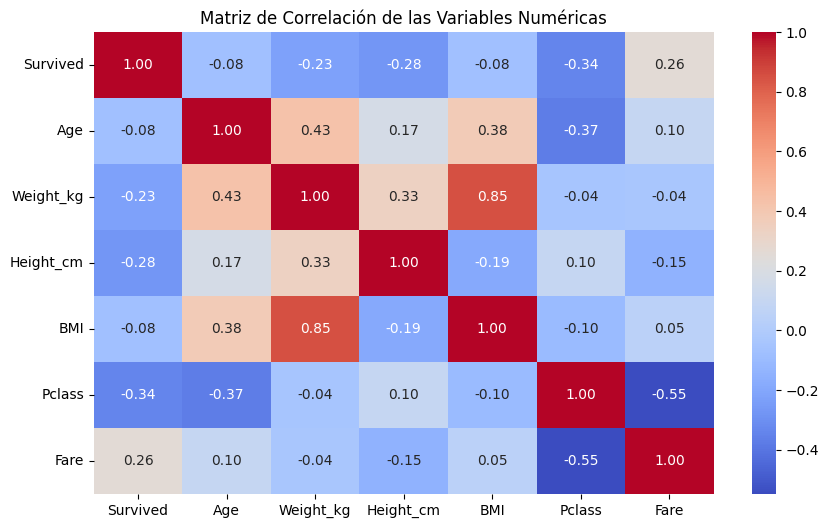

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de correlación de variables numéricas

plt.figure(figsize=(10, 6))
sns.heatmap(titanic[['Survived','Age','Weight_kg','Height_cm','BMI','Pclass','Fare']].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación de las Variables Numéricas')
plt.show()

## Detección de Outliers y Imputación de Valores Faltantes

Identificar y manejar outliers es esencial para la calidad de nuestros análisis. Además, la imputación de valores faltantes nos permite mantener la integridad del dataset para análisis posteriores.


In [ ]:
# Boxplot para la tarifa en general 'Fare'
fig_fare = px.box(titanic, y="Fare", title="Boxplot de Tarifas para Detectar Outliers")
fig_fare.show()

In [ ]:
# Boxplot para la tarifa por cada clase 'Pclass'
fig_pclass = px.box(titanic, x="Pclass", y="Fare", color="Pclass",
                    title="Boxplot de Tarifas por Clase para Detectar Outliers")
fig_pclass.show()

In [ ]:
# Boxplot para la tarifa en general 'Age'
fig_fare = px.box(titanic, y="Age", title="Boxplot de Edades para Detectar Outliers")
fig_fare.show()

# Outliers no siginifica valores erróneos como en esta caso

## Detección y Eliminación de Outliers

Los outliers pueden distorsionar los resultados del análisis estadístico y los modelos predictivos. Es crucial detectar y decidir cómo manejar estos valores extremos. Analizaremos los outliers en las tarifas pagadas por los pasajeros y discutiremos métodos para su tratamiento.


In [ ]:
# Revisar el dataset antes de eliminar outliers
print(titanic['Fare'].describe())

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


In [ ]:
# Revisar el dataset antes de eliminar outliers
print(titanic['Age'].describe())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


In [ ]:
# Detección de outliers en 'Fare' por 'Pclass'
for pclass in titanic['Pclass'].unique():
    fare_data = titanic[titanic['Pclass'] == pclass]['Fare']
    Q1 = fare_data.quantile(0.25)
    Q3 = fare_data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = fare_data[(fare_data < (Q1 - 1.5 * IQR)) | (fare_data > (Q3 + 1.5 * IQR))]
    print(f"Outliers en la clase {pclass} están en el rango de {outliers.min()} a {outliers.max()}")

# Eliminación de outliers en 'Fare'
titanic['Fare'] = titanic.apply(
    lambda row: np.nan if ((row['Fare'] < (Q1 - 1.5 * IQR)) or (row['Fare'] > (Q3 + 1.5 * IQR))) else row['Fare'], axis=1
)

# CUIDADO QUE ESTAMOS ASIGNANDO UN VALOR NULO -> DESPUÉS PODEMOS IMPUTARLO O BIEN ELIMINARLO

Outliers en la clase 3 están en el rango de 27.9 a 69.55
Outliers en la clase 1 están en el rango de 211.3375 a 512.3292
Outliers en la clase 2 están en el rango de 65.0 a 73.5


In [ ]:
# Revisar el dataset después de eliminar outliers
print(titanic['Fare'].describe())

count    720.000000
mean      15.053373
std        9.418591
min        0.000000
25%        7.878150
50%       10.500000
75%       23.000000
max       42.400000
Name: Fare, dtype: float64


In [ ]:
# Boxplot para la tarifa por cada clase 'Pclass'
fig_pclass = px.box(titanic, x="Pclass", y="Fare", color="Pclass",
                    title="Boxplot de Tarifas por Clase para Detectar Outliers")
fig_pclass.show()

## Imputación de Valores Faltantes

Después de eliminar outliers, abordaremos los valores faltantes en nuestro dataset, utilizando varias técnicas de imputación adecuadas para cada tipo de dato.


In [ ]:
# Imputación de la edad utilizando la mediana
print(f"Valores nulos en 'Age' antes de la imputación: {titanic['Age'].isnull().sum()}")
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
print(f"Valores nulos en 'Age' después de la imputación: {titanic['Age'].isnull().sum()}")

Valores nulos en 'Age' antes de la imputación: 177
Valores nulos en 'Age' después de la imputación: 0


In [ ]:
import plotly.express as px

# Histograma de la Edad de los Pasajeros con Plotly

# Seleccionamos un número mayor de bins para una mayor granularidad.
fig = px.histogram(titanic, x="Age", nbins=30, title="Distribución de la Edad de los Pasajeros")  # Ajusta 'nbins' según lo necesario.

# Podemos mejorar la estética del gráfico con algunos ajustes de estilo.
fig.update_layout(
    xaxis_title="Edad",
    yaxis_title="Frecuencia",
    bargap=0.1,  # Espacio entre barras
    plot_bgcolor="white",  # Fondo blanco para mayor claridad
    xaxis=dict(
        showline=True,  # Mostrar líneas del eje x
        showgrid=True,  # Mostrar la cuadrícula
        gridcolor="lightgrey",  # Color de la cuadrícula
    ),
    yaxis=dict(
        showline=True,  # Mostrar líneas del eje y
        showgrid=True,  # Mostrar la cuadrícula
        gridcolor="lightgrey",  # Color de la cuadrícula
    )
)

# Para colores más vibrantes, puedes personalizar los colores de las barras.
fig.update_traces(marker_color='royalblue')  # Elige el color que prefieras

fig.show()

# HAY QUE ELEGIR CORRECTAMENTE EL CRITERIO PARA IMPUTAR VALORES DE ACUERDO AL CONTEXTO
# Y CONOCER EL IMPACTO QUE PUEDE TENER ESA IMPUTACIÓN EN EL RESTO DEL ANÁLISIS.

In [ ]:
# Imputación por la media en 'Fare' -> Se decide imputar los valores nulos pero se podrían remover
print(f"Valores nulos en 'Fare' antes de la imputación: {titanic['Fare'].isnull().sum()}")
titanic['Fare'].fillna(titanic['Fare'].median(), inplace=True)
print(f"Valores nulos en 'Fare' después de la imputación: {titanic['Fare'].isnull().sum()}")

Valores nulos en 'Fare' antes de la imputación: 171
Valores nulos en 'Fare' después de la imputación: 0


In [ ]:
# Boxplot para la tarifa por cada clase 'Pclass'
fig_pclass = px.box(titanic, x="Pclass", y="Fare", color="Pclass",
                    title="Boxplot de Tarifas por Clase para Detectar Outliers")
fig_pclass.show()

# SE COMETE EL ERROR DE MEDIA DE TODAS LAS TARIFAS Y NO POR CLASE. ESO PUEDE SER UN ERROR.

In [ ]:
# ALTERNATIVA A CELDA ANTERIOR PARA DROPEAR LOS VALORES

# Contamos los valores nulos antes de eliminarlos
valores_nulos_antes = titanic['Fare'].isnull().sum()
print(f"Valores nulos en 'Fare' antes de la eliminación: {valores_nulos_antes}")

# Eliminamos las filas con valores nulos en 'Fare'
titanic.dropna(subset=['Fare'], inplace=True)

# Contamos los valores nulos después de eliminarlos
valores_nulos_despues = titanic['Fare'].isnull().sum()
print(f"Valores nulos en 'Fare' después de la eliminación: {valores_nulos_despues}")

In [ ]:
# Imputación por la moda en columnas categóricas
print(f"Valores nulos en 'Embarked' antes de la imputación: {titanic['Embarked'].isnull().sum()}")
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
print(f"Valores nulos en 'Embarked' después de la imputación: {titanic['Embarked'].isnull().sum()}")

Valores nulos en 'Embarked' antes de la imputación: 2
Valores nulos en 'Embarked' después de la imputación: 0


## Mas visualizaciones interactivas con Plotly

Utilizaremos Plotly para crear visualizaciones interactivas que nos permitan explorar más profundamente las relaciones entre diferentes variables y eventos del dataset del Titanic. Las gráficas interactivas ofrecen una mejor experiencia de usuario y permiten un análisis más detallado.

In [ ]:
# Gráfica de supervivencia por tipo de dieta
fig_diet = px.histogram(titanic, x='Diet_Type', color='Survived', barmode='group',
                        title="Supervivencia por Tipo de Dieta",
                        labels={'Survived':'Supervivencia', 'Diet_Type':'Tipo de Dieta'})
fig_diet.show()

In [ ]:
# Gráfica de supervivencia por profesión
fig_profession = px.histogram(titanic, x='Profession', color='Survived', barmode='group',
                               title="Supervivencia por Profesión",
                               labels={'Survived':'Supervivencia', 'Profession':'Profesión'})
fig_profession.show()

In [ ]:
# Serie de tiempo - Fechas de compra de ticket

# Convertimos la columna a tipo datetime, si aún no lo está
titanic['Ticket_Purchase_DateTime'] = pd.to_datetime(titanic['Ticket_Purchase_DateTime'])

# Extraemos solo la fecha, sin la hora
titanic['Ticket_Purchase_Date'] = titanic['Ticket_Purchase_DateTime'].dt.date

# Agrupamos por la nueva columna de fecha y contamos las ocurrencias
ticket_purchase_daily = titanic.groupby('Ticket_Purchase_Date').size().reset_index(name='Count')

# Creamos el gráfico de barras con las fechas y las cuentas diarias
fig = px.bar(ticket_purchase_daily, x='Ticket_Purchase_Date', y='Count',
             title='Fechas de Compra de Tickets Agrupadas por Día',
             labels={'Ticket_Purchase_Date':'Fecha de Compra del Ticket', 'Count':'Cantidad de Tickets'})
fig.update_xaxes(title='Fecha de Compra del Ticket')
fig.update_yaxes(title='Cantidad de Tickets Comprados')
fig.show()


In [ ]:
# Serie de tiempo - Muertos que va habiendo por hora y minuto en el hundimiento
titanic['Drowning_Time'] = titanic['Estimated_Drowning_Time'].dropna()
fig_drowning = px.histogram(titanic, x='Drowning_Time', color='Pclass',
                            title="Muertos por Hora y Minuto Durante el Hundimiento",
                            labels={'Drowning_Time':'Hora y Minuto de Ahogamiento', 'Pclass':'Clase'})
fig_drowning.show()

In [ ]:
# Histograma de Edad y Peso por Sexo

fig = px.histogram(titanic, x=["Age", "Weight_kg"], color="Sex",
                   barmode='overlay', histnorm='probability density',
                   title="Distribución de Edad y Peso por Sexo")
fig.show()

In [ ]:
# Diagrama de Dispersión con Burbujas de Edad, Tarifa y Supervivencia
fig = px.scatter(titanic, x="Age", y="Fare", size="Fare", color="Survived",
                 hover_name="Name", title="Relación entre Edad, Tarifa y Supervivencia",
                 labels={"Survived": "Sobrevivió"})
fig.show()

In [ ]:
# Boxplot de la Tarifa pagada por Clase y Puerto de Embarque
fig = px.box(titanic, x="Pclass", y="Fare", color="Embarked",
             title="Distribución de Tarifa por Clase y Puerto de Embarque")
fig.show()

In [ ]:
# Barras Apiladas de Supervivencia por Título y Clase
fig = px.histogram(titanic, x="Title", color="Survived", barmode='stack',
                   facet_row="Pclass", title="Tasa de Supervivencia por Título y Clase")
fig.show()

In [ ]:
# Establecer un umbral para considerar un título como minoritario, por ejemplo, si aparece menos de 10 veces
threshold = 10

# Contar la frecuencia de cada título
title_counts = titanic['Title'].value_counts()

# Crear un set de títulos minoritarios
minor_titles = title_counts[title_counts < threshold].index

# Función para reemplazar títulos minoritarios con 'Other'
def replace_minor_titles(title):
    if title in minor_titles:
        return 'Other'
    return title

# Aplicar la función a la columna 'Title'
titanic['Title_Cleaned'] = titanic['Title'].apply(replace_minor_titles)

# Ahora, actualizamos la visualización en Plotly con los títulos agrupados
fig = px.histogram(titanic, x="Title_Cleaned", color="Survived", barmode='stack',
                   facet_row="Pclass", title="Tasa de Supervivencia por Título (Agrupados) y Clase")
fig.show()

In [ ]:
# Diagrama de Violín del IMC (BMI) por Diferentes Dietas
fig = px.violin(titanic, y="BMI", x="Diet_Type", color="Diet_Type", box=True, points="all",
                title="Distribución del IMC por Diferentes Dietas")
fig.show()

In [ ]:
# Calculamos la media de la tarifa para cada fecha de compra
fare_over_time = titanic.groupby(titanic['Ticket_Purchase_DateTime'].dt.date)['Fare'].mean().reset_index()

# Gráfico de dispersión de la evolución del precio medio de los tickets a lo largo del tiempo
fig = px.scatter(fare_over_time, x="Ticket_Purchase_DateTime", y="Fare",
                 title="Evolución del Precio Medio de los Tickets a lo Largo del Tiempo",
                 labels={"Ticket_Purchase_DateTime": "Fecha de Compra", "Fare": "Tarifa Media"})
fig.show()

In [ ]:
# Gráfico de líneas para la evolución del precio medio de los tickets a lo largo del tiempo
fig = px.line(fare_over_time, x="Ticket_Purchase_DateTime", y="Fare",
              title="Evolución del Precio Medio de los Tickets a lo Largo del Tiempo",
              labels={"Ticket_Purchase_DateTime": "Fecha de Compra", "Fare": "Tarifa Media"})
fig.show()

In [ ]:
# Mapa de Árbol de Pasajeros por Profesión y Estado Civil
fig = px.treemap(titanic, path=['Profession', 'Marital_Status'],
                 title="Distribución de Pasajeros por Profesión y Estado Civil")
fig.show()

In [ ]:
# Gráfico Radial de Estado Civil en Relación a la Clase
fig = px.bar_polar(titanic, r="Fare", theta="Marital_Status", color="Pclass",
                   template="plotly_white", title="Estado Civil por Clase en Gráfico Radial")
fig.show()

In [ ]:
# Primero, agrupamos por 'Embark_Date' y contamos las entradas para esa fecha.
embark_counts = titanic['Embark_Date'].value_counts().reset_index()
embark_counts.columns = ['Embark_Date', 'Count']

# Luego, creamos un gráfico de barras con esta información.
fig = px.bar(embark_counts, x='Embark_Date', y='Count',
             title='Número de Personas que Embarcaron por Día',
             labels={'Embark_Date': 'Fecha de Embarque', 'Count': 'Número de Pasajeros'})
fig.show()

In [ ]:
# Gráfico de Densidad Conjunta de Edad y Peso
fig = px.density_contour(titanic, x="Age", y="Weight_kg", title="Densidad Conjunta de Edad y Peso")
fig.show()

# Conclusiones Generales del Análisis Exploratorio de Datos (EDA)

## Importancia del EDA

El EDA es un paso fundamental en el proceso de minería de datos. Permite a los científicos y analistas de datos:

- Comprender mejor las características de los datos.
- Detectar posibles errores, valores atípicos o anomalías.
- Explorar las relaciones subyacentes entre las variables.
- Formular hipótesis iniciales y preguntas para investigaciones más profundas.
- Seleccionar las técnicas de modelado apropiadas.

## Recomendaciones

- **Calidad de los Datos:** Antes de cualquier análisis, asegúrate de que tus datos sean de alta calidad. Limpia y trata los valores faltantes, duplicados y atípicos de manera adecuada.
- **Visualización de Datos:** Utiliza gráficos y visualizaciones para resumir y entender los datos. Las visualizaciones deben ser claras y concisas, evitando sobrecargarlas de información.
- **Variedad en el Análisis:** No te limites a una sola técnica o herramienta. Experimenta con diferentes tipos de gráficos y estadísticas descriptivas.
- **Documentación:** Documenta tus hallazgos y el proceso que seguiste. Esto es vital para que otros puedan entender tu razonamiento y para futuras referencias.
- **Comprobaciones de Hipótesis:** Aprovecha el EDA para generar hipótesis, pero recuerda que se deben confirmar o refutar con métodos estadísticos formales fuera del EDA.
- **Reproductibilidad:** Asegura que tu EDA sea reproducible. Esto significa usar scripts que otros puedan ejecutar, con comentarios claros y código ordenado.

## Importancia de una Comunicación Efectiva

- **Claridad en la Presentación:** Presenta los resultados de manera que sean comprensibles para todas las partes interesadas, no solo para otros analistas de datos.
- **Narrativa de Datos:** Construye una narrativa alrededor de tus datos. Una buena historia puede hacer que los datos sean más impactantes y memorables.

## Reflexiones Finales

- Un EDA bien ejecutado es un pilar en la toma de decisiones basada en datos.
- El tiempo invertido en un buen EDA puede ahorrar esfuerzos más adelante en el proceso de modelado.
- Siempre hay lugar para mejorar. Revise su EDA con colegas y no tenga miedo de volver atrás para explorar nuevas ideas o corregir errores.

Este proceso debe ser iterativo y adaptativo, guiado por la curiosidad y el rigor científico. Recuerda que el objetivo es entender los datos, y no simplemente pasar a través de una lista de tareas.
